100.0%


Extracting ./data\FashionMNIST\raw\train-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



100.0%


Extracting ./data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



100.0%


Extracting ./data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



100.0%


Extracting ./data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw

Epoch 1/10, Loss: 0.5162, Accuracy: 0.8133
Epoch 2/10, Loss: 0.3810, Accuracy: 0.8614
Epoch 3/10, Loss: 0.3416, Accuracy: 0.8742
Epoch 4/10, Loss: 0.3157, Accuracy: 0.8822
Epoch 5/10, Loss: 0.2974, Accuracy: 0.8899
Epoch 6/10, Loss: 0.2810, Accuracy: 0.8963
Epoch 7/10, Loss: 0.2683, Accuracy: 0.9004
Epoch 8/10, Loss: 0.2572, Accuracy: 0.9041
Epoch 9/10, Loss: 0.2472, Accuracy: 0.9072
Epoch 10/10, Loss: 0.2375, Accuracy: 0.9102


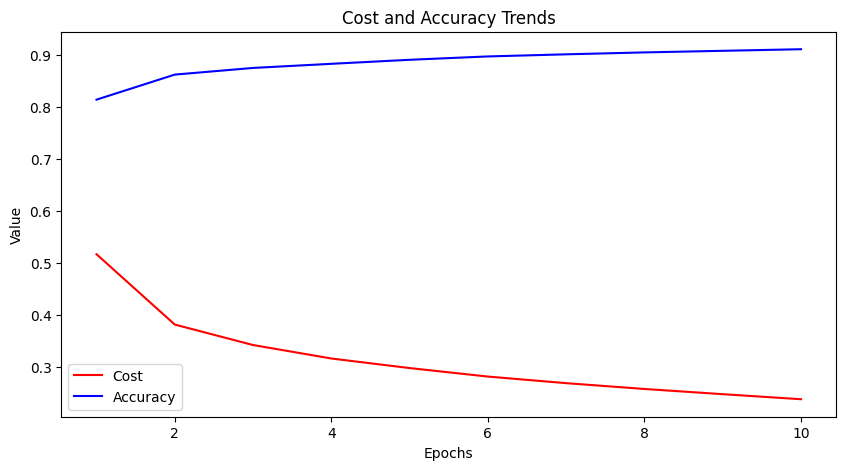

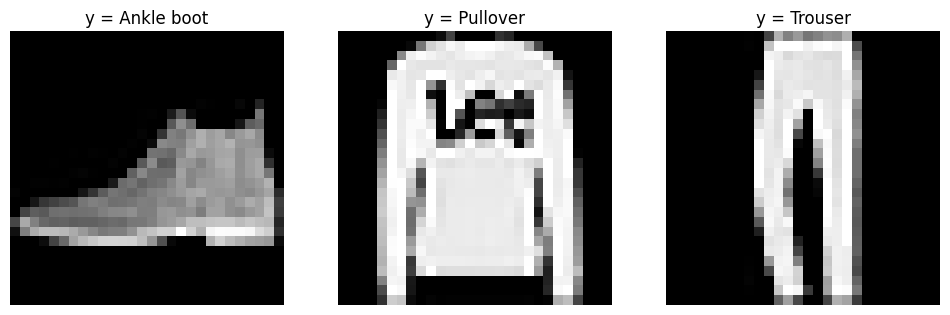

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Define device (use GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the Fashion MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Define the neural network model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = Net().to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model and recording cost and accuracy
epochs = 10
costs = []
accuracies = []

for epoch in range(epochs):
    running_loss = 0.0
    correct = 0
    total = 0
    model.train()
    for inputs, labels in trainloader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # Append epoch loss and accuracy
    epoch_loss = running_loss / len(trainloader)
    epoch_accuracy = correct / total

    costs.append(epoch_loss)
    accuracies.append(epoch_accuracy)

    print(f"Epoch {epoch + 1}/{epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}")

# Plot cost and accuracy
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), costs, label='Cost', color='red')
plt.plot(range(1, epochs + 1), accuracies, label='Accuracy', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Cost and Accuracy Trends')
plt.legend()
plt.show()

# Visualize the first three images of the validation dataset
def show_data(data_loader):
    dataiter = iter(data_loader)
    images, labels = next(dataiter)
    labels_map = {
        0: "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
        5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"
    }

    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    for i in range(3):
        image, label = images[i], labels[i]
        axes[i].imshow(image.squeeze(), cmap="gray")
        axes[i].set_title(f"y = {labels_map[label.item()]}")
        axes[i].axis("off")
    plt.show()

# Display the first three images
show_data(testloader)


1. Change the Output Layer

In [1]:
import torch
import torch.nn as nn
from torchvision import models

# Load the pre-trained ResNet18 model
resnet18 = models.resnet18(pretrained=True)

# Freeze all layers except the last layer
for param in resnet18.parameters():
    param.requires_grad = False

# Modify the output layer
num_classes = 2  # Positive and Negative classes
resnet18.fc = nn.Linear(resnet18.fc.in_features, num_classes)

# Display the modified model
print(resnet18)

c:\Users\Irshaad\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Irshaad\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\Irshaad/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100.0%


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

2. Train the Model

In [5]:
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Data transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# Load datasets
train_dataset = datasets.ImageFolder('C:\\Users\\Irshaad\\Desktop\\AI Engineering\\train_data', transform=transform)
valid_dataset = datasets.ImageFolder('C:\\Users\\Irshaad\Desktop\\AI Engineering\\validation_data', transform=transform)

# Dataloaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(resnet18.fc.parameters(), lr=0.001)

# Training loop
num_epochs = 5
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
resnet18.to(device)

for epoch in range(num_epochs):
    resnet18.train()
    running_loss = 0.0
    
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = resnet18(inputs)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimize
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}")

# Save the trained model
torch.save(resnet18.state_dict(), "resnet18_model.pth")


<>:13: SyntaxWarning: invalid escape sequence '\D'
<>:13: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Irshaad\AppData\Local\Temp\ipykernel_11716\1936287109.py:13: SyntaxWarning: invalid escape sequence '\D'
  valid_dataset = datasets.ImageFolder('C:\\Users\\Irshaad\Desktop\\AI Engineering\\validation_data', transform=transform)


Epoch 1/5, Loss: 0.7467545866966248
Epoch 2/5, Loss: 0.5622859001159668
Epoch 3/5, Loss: 0.4919821321964264
Epoch 4/5, Loss: 0.455912709236145
Epoch 5/5, Loss: 0.4092065691947937


3. Identify Misclassified Samples

C:\Users\Irshaad\AppData\Local\Temp\ipykernel_11716\2979799699.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  resnet18.load_state_dict(torch.load("resnet18_model.pth"))

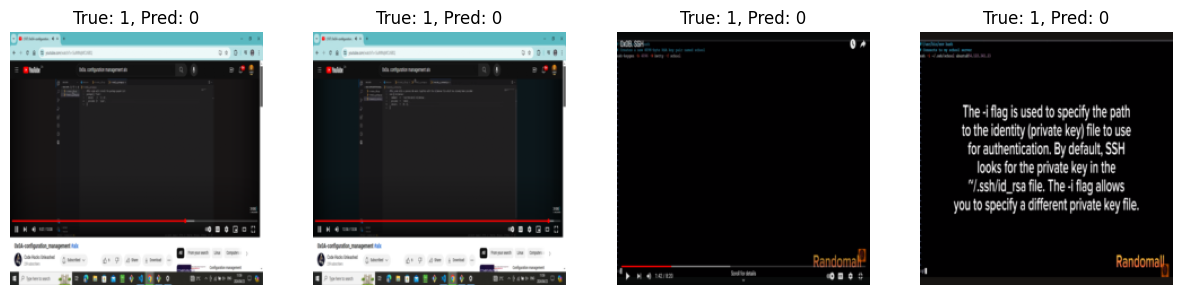

In [6]:
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

# Load the trained model
resnet18.eval()
resnet18.load_state_dict(torch.load("resnet18_model.pth"))

misclassified_samples = []

with torch.no_grad():
    for inputs, labels in valid_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = resnet18(inputs)
        _, preds = torch.max(outputs, 1)
        
        # Find misclassified samples
        for i in range(len(labels)):
            if preds[i] != labels[i]:
                misclassified_samples.append((inputs[i].cpu(), labels[i].cpu(), preds[i].cpu()))

# Display the first four misclassified samples
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
for idx, (image, label, pred) in enumerate(misclassified_samples[:4]):
    axes[idx].imshow(image.permute(1, 2, 0))  # Convert tensor to image
    axes[idx].set_title(f"True: {label}, Pred: {pred}")
    axes[idx].axis('off')
plt.show()
